In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [53]:
hbar=1.0
L=1.0
m = 1.0

def V(x): #defining the potential
    if(x>L):
        return 0.0
    elif(x<0):
        return 0.0
    else:
        v = L*x -L
        return v
    

#first diff eq: psi'(x) = psi'(x)
#second diff eq: psi"(x) = -2.0 * (E - V(x)) with constants substituted in
def function_particle(x,psi): #here we define the actual diff eqs
    f0=psi[1]
    f1=psi[0]*(-2.0*(E-V(x)))
    return np.array([f0,f1])

In [54]:
xspan = np.linspace(0, 1, 1000)# defining the array of xvalues 1000 values between 0 and 1

In [55]:
#function that uses solve_ivp to create array of points that satisfy the diff eq's given
def f(Eguess):
    global E
    E=Eguess #initial guess of energy
    sol = solve_ivp(function_particle,  [xspan[0], xspan[-1]], [0.0, 1.0],t_eval=xspan,dense_output=True)
    #return array of psi(x)'s and psi'(x)'s
    return sol.y[0][-1]

#this function finds the position of the midpoint, it takes the current lower and higher bracket points as input
def midpoint(E_low, E_high):
    return np.median([E_low, E_high])

#this function finds how big our bracket is
def precision(current_E_low, current_E_high):
    return current_E_high-current_E_low

# set precision we want
desired_prec=0.001

#now we are checking for the precision and then, if it is not reached 
# -finding the new midpoint
# - checking its sign and either modifying lower or higher bracket or returning the perfect answer
## we could have outsourced the decision tree into another function to make our final execution even neater :)
def find_energy(desired_prec, E_lo, E_hi):
    while precision(E_lo, E_hi) > desired_prec:
        mid=midpoint(E_lo, E_hi) #find newest midpoint
        psi_at_mid=f(mid) #find the psi(L) value at the midpoint
        psi_at_E_lo=f(E_lo) #find the psi(L) value for the lower guess of E
        psi_at_E_hi=f(E_hi) #find the psi(L) value for the higher guess of E
    
        if np.sign(psi_at_mid) == np.sign(psi_at_E_lo):   #compare signs we need to find where y(2pi) flips sign
            E_lo=mid
    
        elif np.sign(psi_at_mid) == np.sign(psi_at_E_hi):
            E_hi=mid
    
        elif psi_at_mid == 0:
            print("Your answer is exactly "+" "+str(mid))
            break #this kills the loop as we are done here.

    final_answer=midpoint(E_lo, E_hi) #calculates the midpoint one more time so get out final answer  
    return final_answer

# Part a:

In [62]:
#define initial guesses for ground state
E_low1=0.0
E_hi1=5.0
energy1 = find_energy(desired_prec, E_low1, E_hi1)
print("The ground state energy for the system is "+str(energy1))

The ground state energy for the system is 4.43084716796875


Now make guesses for next 2 energy levels:

In [65]:
#define initial guesses for first excited state (new low is larger than the last energy)
E_low2 = 5
E_hi2 = 20
energy2 = find_energy(desired_prec, E_low2, E_hi2)
print("The first excited state energy for the system is "+str(energy2))

The first excited state energy for the system is 19.230499267578125


In [66]:
#define initial guesses for second excited state (new low is larger than the last energy)
E_low3 = 20
E_hi3 = 50
energy3 = find_energy(desired_prec, E_low3, E_hi3)
print("The second excited state energy for the system is "+str(energy3))

The second excited state energy for the system is 43.889312744140625


# Part b:

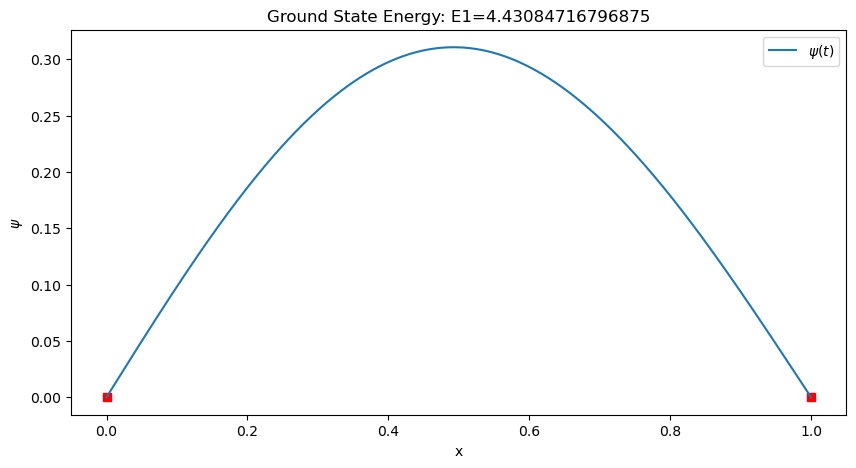

In [67]:
#graph the wavefunction for the Ground Energy State
E=energy1
sol = solve_ivp(function_particle,  [xspan[0], xspan[-1]], [0.0, 1.0],t_eval=xspan,dense_output=True)
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(sol.t,sol.y[0], label="$\psi(t)$")
#plt.plot(sol.t, sol.y[1], label="$\psi$'")
plt.scatter([0.0,1.0],[0.0,0.0],color='red',marker='s')
#plt.scatter(0.0, 1.0, color='green', marker='s')
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("Ground State Energy: E1=" + str(E))
plt.legend()
plt.show()

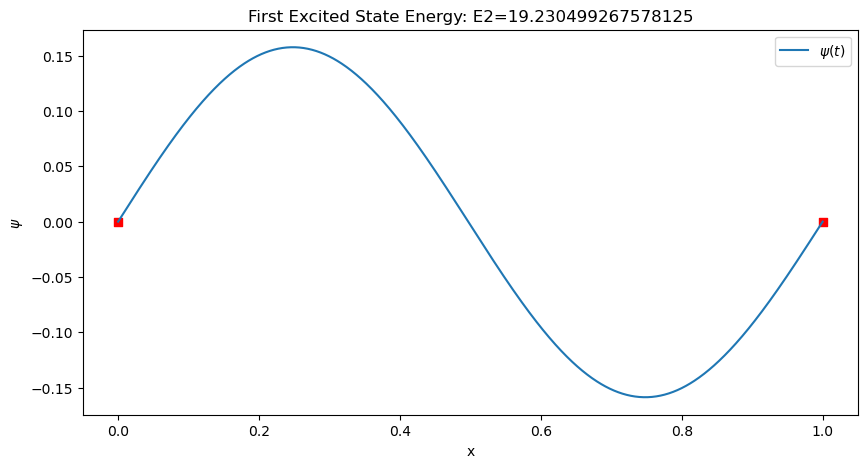

In [68]:
#graph the wavefunction for the First Excited State
E=energy2
sol = solve_ivp(function_particle,  [xspan[0], xspan[-1]], [0.0, 1.0],t_eval=xspan,dense_output=True)
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(sol.t,sol.y[0], label="$\psi(t)$")
#plt.plot(sol.t, sol.y[1], label="$\psi$'")
plt.scatter([0.0,1.0],[0.0,0.0],color='red',marker='s')
#plt.scatter(0.0, 1.0, color='green', marker='s')
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("First Excited State Energy: E2=" + str(E))
plt.legend()
plt.show()

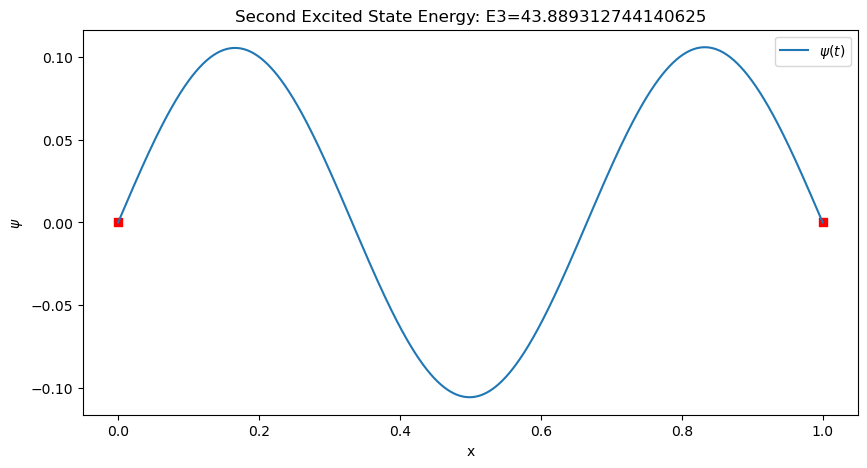

In [70]:
#graph wavefunction for Second Excited State
E=energy3
sol = solve_ivp(function_particle,  [xspan[0], xspan[-1]], [0.0, 1.0],t_eval=xspan,dense_output=True)
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(sol.t,sol.y[0], label="$\psi(t)$")
#plt.plot(sol.t, sol.y[1], label="$\psi$'")
plt.scatter([0.0,1.0],[0.0,0.0],color='red',marker='s')
#plt.scatter(0.0, 1.0, color='green', marker='s')
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.title("Second Excited State Energy: E3=" + str(E))
plt.legend()
plt.show()